
Missing Values before cleaning:
Rank           0
Points         0
Tournaments    0
Name           0
Nationality    0
dtype: int64

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         100 non-null    int32 
 1   Points       100 non-null    int64 
 2   Tournaments  100 non-null    int64 
 3   Name         100 non-null    object
 4   Nationality  100 non-null    object
dtypes: int32(1), int64(2), object(2)
memory usage: 3.6+ KB
None


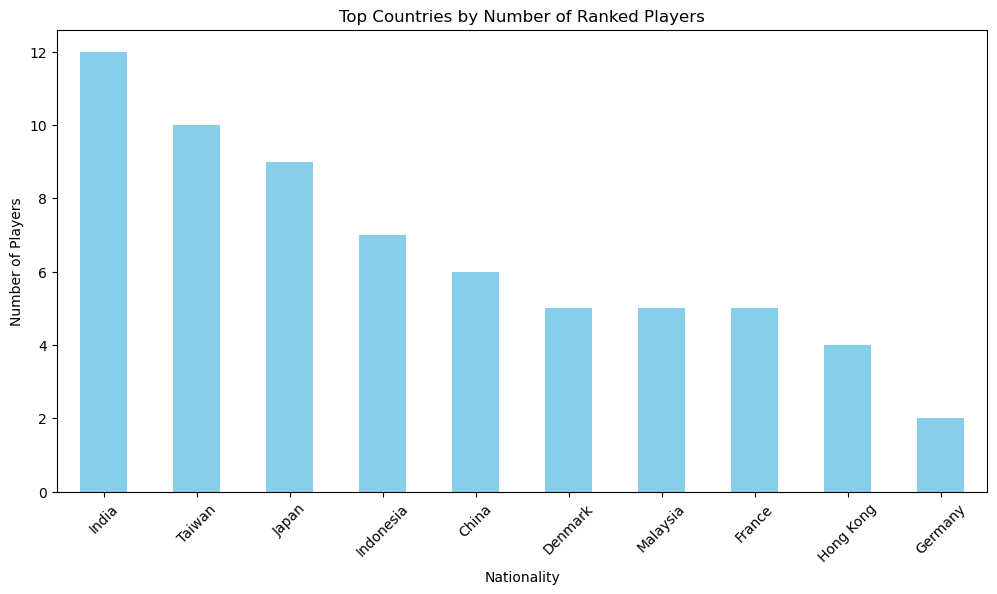

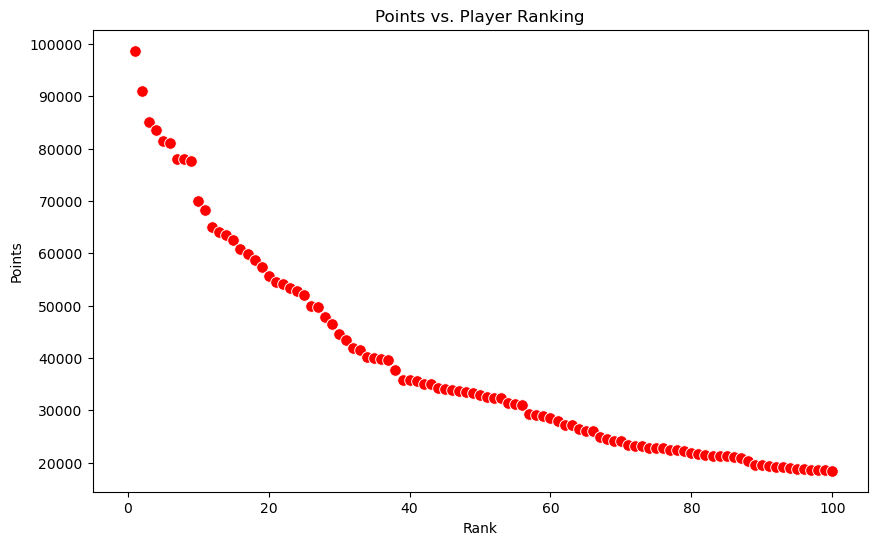

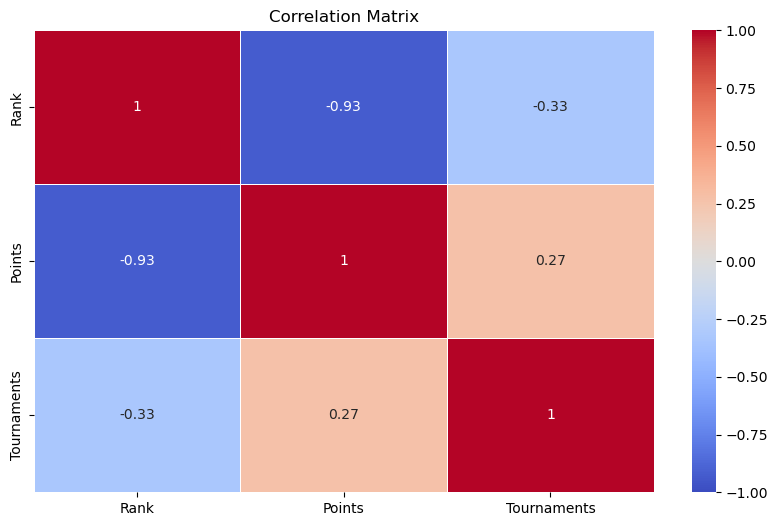

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pathfile to import file
file_path = "C:/Users/AGHA SAUD/Downloads/flashscore.csv"
data = pd.read_csv(file_path)

# defined function to load data set and then loaded data and printed the first few rows
def load_data(data):

    data = pd.read_csv(file_path)
    print("Initial Data:")
    print(data.head())
    return data
    
# created function to clean data, checking if there are any missing values or duplicates and coorect data types
def clean_data(data):
    
# missing values
    print("\nMissing val before cleaning:")
    print(data.isnull().sum())
    
# Drop any rows with missing values
    data = data.dropna()

# Remove duplicates
    data = data.drop_duplicates()

# Ensure correct data types, especially for 'ranking' and 'points' as integers
    data['Rank'] = pd.to_numeric(data['Rank'], errors='coerce').astype(int)
    data['Points'] = pd.to_numeric(data['Points'], errors='coerce')
    data['Tournaments'] = pd.to_numeric(data['Tournaments'], errors='coerce')
    
    print("\nData after cleaning:")
    print(data.info())
    return data
data = clean_data(data)

# plot 1 is a bar chart that is showing top countires by adding number of players in top world 100 rankings
def plot_top_Nationality(data):

    plt.figure(figsize=(12, 6))
    top_countries = data['Nationality'].value_counts().head(10)
    top_countries.plot(kind='bar', color='skyblue')
    plt.xlabel('Nationality')
    plt.ylabel('Number of Players')
    plt.title('Top Countries by Number of Ranked Players')
    plt.xticks(rotation=45)
    plt.show()
plot_top_Nationality(data)

# plot 2 is a scatter plot that shows the relationship between player ranking and ponits player get by playing a tournament.
def plot_Points_vs_Rank(data):
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Rank', y='Points', data=data, color='red', s=70)
    plt.xlabel('Rank')
    plt.ylabel('Points')
    plt.xlim(-5, 105)
    plt.title('Points vs. Player Ranking')
    plt.show()
plot_Points_vs_Rank(data)

#plot 3 is a heatmap that is showing correlation between ranking of player, points player get and number of tournaments played by player
def plot_correlation_heatmap(data):
 
    plt.figure(figsize=(10, 6))
    corr_matrix = data[['Rank', 'Points', 'Tournaments']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
plot_correlation_heatmap(data)
